<a href="https://colab.research.google.com/github/SaiVamsiPuttu/machine_translation/blob/main/machine_translation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing 'Transformer Architecture' and 'Indic Library'

In [ ]:
!pip install transformers

     |████████████████████████████████| 2.3MB 2.3MB/s 
     |████████████████████████████████| 3.3MB 22.8MB/s 
     |████████████████████████████████| 901kB 40.5MB/s 


In [ ]:
!pip install indic-nlp-library

     |████████████████████████████████| 40kB 2.2MB/s 
     |████████████████████████████████| 9.2MB 4.3MB/s 
     |████████████████████████████████| 552kB 48.8MB/s 
  Created wheel for sphinx-argparse: filename=sphinx_argparse-0.2.5-cp37-none-any.whl size=11552 sha256=b053b8fde2c5494197ba9ddf13997b897c78792143b4d5f98ad02582e8429678
  Stored in directory: /root/.cache/pip/wheels/2a/18/1b/4990a1859da4edc77ab312bc2986c08d2733fb5713d06e44f5
Successfully built sphinx-argparse
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: docutils 0.17.1
    Uninstalling docutils-0.17.1:
      Successfully uninstalled docutils-0.17.1


# Importing required libraries

In [ ]:
from transformers import pipeline
from transformers import AutoTokenizer
import string
import re
from pickle import dump
from unicodedata import normalize
from numpy import array
from indicnlp.normalize.indic_normalize import DevanagariNormalizer
from indicnlp.tokenize import indic_tokenize  
from numpy import argmax
from nltk.translate.bleu_score import corpus_bleu
from pickle import load
from numpy.random import rand
from numpy.random import shuffle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.callbacks import ModelCheckpoint
import pandas as pd
import numpy as np
import string
from string import digits
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
#from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, CuDNNLSTM, CuDNNGRU, TimeDistributed, Flatten, Dropout, Bidirectional, RepeatVector
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from numpy import array, argmax
from numpy.random import rand, shuffle
from nltk.translate.bleu_score import corpus_bleu, sentence_bleu
from tensorflow.keras.applications import Xception
#import keras.utils.multi_gpu_model
from tensorflow.keras.utils import to_categorical
import scipy
import statsmodels
import sklearn
import tensorflow as tf
tf.compat.v1.enable_eager_execution()
from io import open
import unicodedata
import random
import math
import os
import time
import re
import sys
from unicodedata import normalize
from numpy import array
from pickle import dump, load
from tensorflow.keras.layers import RepeatVector, TimeDistributed
from tensorflow.keras.callbacks import ModelCheckpoint

INDIC_NLP_LIB_HOME=r"anoopkunchukuttan-indic_nlp_library-eccde81/src"
INDIC_NLP_RESOURCES=r"indic_nlp_resources-master"
sys.path.append(r'{}'.format(INDIC_NLP_LIB_HOME))
from indicnlp import common
common.set_resources_path(INDIC_NLP_RESOURCES)
from indicnlp import loader
from indicnlp.normalize.indic_normalize import IndicNormalizerFactory
from indicnlp.tokenize import indic_tokenize

In [ ]:
tf.executing_eagerly()

True

# Data Acquisition

In [ ]:
# Acquire Dataset
malayalam = pd.read_fwf('/content/drive/MyDrive/NLP/Project/train.ml',columns='malayalam_text')
telugu = pd.read_fwf('/content/drive/MyDrive/NLP/Project/train.te',columns=['telugu_text','extension1','extension2','extension3','extension4'])

In [ ]:
telugu.columns = ['telugu_text','extension1','extension2','extension3','extension4']

In [ ]:
malayalam.columns = ['malayalam_text']

In [ ]:
df_malayalam = malayalam['malayalam_text']

In [ ]:
df_telugu = telugu['telugu_text']

In [ ]:
#df['sentence_length'] = df['Event'].str.split("/").str.len()
malayalam['sentence_length'] = malayalam['malayalam_text'].str.len()

In [ ]:
df = malayalam['sentence_length'].value_counts().rename_axis('length of sentence').reset_index(name='no of sentences')

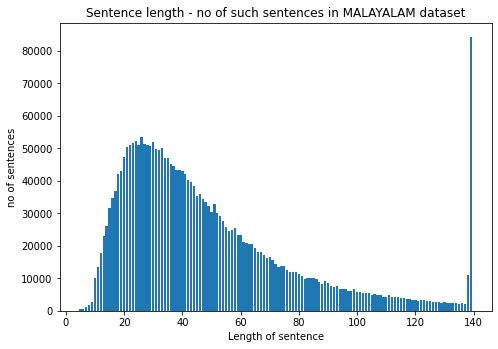

Max malayalam sentence length:  139
Min malayalam sentence length:  5
Mean malayalam sentence length:  72.0


In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sentLength = df['length of sentence']
noOfSent = df['no of sentences']
ax.bar(sentLength,noOfSent)
plt.title('Sentence length - no of such sentences in MALAYALAM dataset')
plt.xlabel('Length of sentence')
plt.ylabel('no of sentences')
plt.savefig('/content/drive/MyDrive/NLP/Project/Dataset/mal_Sent_distr.png')
plt.show()
print("Max malayalam sentence length: ",df['length of sentence'].max())
print("Min malayalam sentence length: ",df['length of sentence'].min())
print("Mean malayalam sentence length: ",df['length of sentence'].mean())

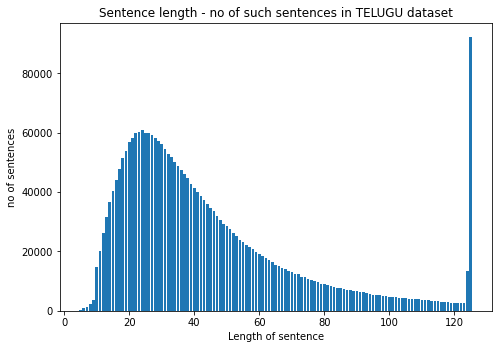

Max telugu sentence length:  125
Min telugu sentence length:  5
Mean telugu sentence length:  65.0


In [ ]:
telugu['sentence_length'] = telugu['telugu_text'].str.len()
df2 = telugu['sentence_length'].value_counts().rename_axis('length of sentence').reset_index(name='no of sentences')

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sentLength = df2['length of sentence']
noOfSent = df2['no of sentences']
ax.bar(sentLength,noOfSent)
plt.title('Sentence length - no of such sentences in TELUGU dataset')
plt.xlabel('Length of sentence')
plt.ylabel('no of sentences')
plt.savefig('/content/drive/MyDrive/NLP/Project/Dataset/tel_sent_distr.png')
plt.show()

print("Max telugu sentence length: ",df2['length of sentence'].max())
print("Min telugu sentence length: ",df2['length of sentence'].min())
print("Mean telugu sentence length: ",df2['length of sentence'].mean())

# Data Pre-Processing

## Clean Pairs

In [ ]:
def save_clean_data(sentences, filename):
    dump(sentences, open(filename, 'wb'))
    print('Saved: %s' % filename)

def load_clean_sentences(filename):
    return load(open(filename, 'rb'))

# Converted Pre-Processed dataset to 'pickel file'

In [ ]:
def load_doc(filename):
    #file = open(filename, mode='rt', encoding='utf-8')
    file = open(filename, mode='rt',encoding='utf-8')
    text = file.read()
    file.close()
    return text

def to_pairs(mal_text, tel_text):
    #malayalam_lines = mal_text[:].strip().split('\n')
    #telugu_lines = telugu_lines[:].strip().split('\n')
    pairs = []
    for i in range(len(tel_text)):
        pairs.append([])
        pairs[i].append(pre_process_malayalam_sentence(mal_text[i]))
        pairs[i].append(pre_process_telugu_sentence(tel_text[i]))
    return pairs

def clean_text(text):
    text = text.replace(u',','')
    text = text.replace(u'"','')
    text = text.replace(u'"','')
    text = text.replace(u"‘‘",'')
    text = text.replace(u"’’",'')
    text = text.replace(u"''",'')
    text = text.replace(u"।",'')
    text=text.replace(u',','')
    text=text.replace(u'"','')
    text=text.replace(u'(','')
    text=text.replace(u')','')
    text=text.replace(u'"','')
    text=text.replace(u':','')
    text=text.replace(u"'",'')
    text=text.replace(u"‘‘",'')
    text=text.replace(u"’’",'')
    text=text.replace(u"''",'')
    text=text.replace(u".",'')
    text=text.replace(u"-",'')
    text=text.replace(u"।",'')
    text=text.replace(u"?",'')
    text=text.replace(u"\\",'')
    text=text.replace(u"_",'')
    text=text.replace("'", "")
    text=text.replace('"', "")
    text= re.sub("'", '', text)
    text=re.sub('[0-9+\-*/.%]', '', text)
    text=text.strip()
    text=re.sub(' +', ' ',text)
    exclude = set(string.punctuation)
    text= ''.join(ch for ch in text if ch not in exclude)
    return text

def pre_process_malayalam_sentence(line):
    line=re.sub('[a-zA-Z]', '', line)
    line = clean_text(line)
    remove_nuktas = False
    factory = IndicNormalizerFactory()
    normalizer = factory.get_normalizer("ml")
    line = normalizer.normalize(line)
    tokens = list()
    for t in indic_tokenize.trivial_tokenize(line):
        tokens.append(t)
    line = tokens
    line = [word for word in line if not re.search(r'\d', word)]
    line = ' '.join(line)
    line = '<start> '+ line + ' <end>'
    return (line)

def pre_process_telugu_sentence(line):
    line=re.sub('[a-zA-Z]', '', line)
    line = clean_text(line)
    remove_nuktas = False
    factory = IndicNormalizerFactory()
    normalizer = factory.get_normalizer("te")
    line = normalizer.normalize(line)
    tokens = list()
    for t in indic_tokenize.trivial_tokenize(line):
        tokens.append(t)
    line = tokens
    line = [word for word in line if not re.search(r'\d', word)]
    line = ' '.join(line)
    line = '<start> '+ line + ' <end>'
    return (line)

#malayalam_text = load_doc('/content/drive/MyDrive/NLP/Project/Dataset/malayalam.pkl')
#telugu_text = load_doc('/content/drive/MyDrive/NLP/Project/Dataset/telugu.pkl')
"""-----------Commented out as dataset is already prepared and saved as 'pkl' file in drive-------------------------"""
"""pairs = to_pairs(np.array(df_malayalam), np.array(df_telugu))
clean_pairs = np.array(pairs)
save_clean_data(clean_pairs, '/content/drive/MyDrive/NLP/Project/Dataset/clean_malayalam-telugu.pkl')"""

"pairs = to_pairs(np.array(df_malayalam), np.array(df_telugu))\nclean_pairs = np.array(pairs)\nsave_clean_data(clean_pairs, '/content/drive/MyDrive/NLP/Project/Dataset/clean_malayalam-telugu.pkl')"

In [ ]:
line = 'ഷെയ്ൻ തന്റെ ഇൻസ്റ്റ ഗ്രാം പേജിലൂടെയാണ് ചിത്രം പങ്കുവച്ചിരിക്കുന്നത് '
line2 = 'ఈ విషయన్ని స్వయంగా ఆమె తెలిపింది'
pairs = to_pairs([line],[line2])
"""line=re.sub('[a-zA-Z]', '', line)
line = clean_text(line)
factory = IndicNormalizerFactory()
normalizer = factory.get_normalizer("ml")
line = normalizer.normalize(line)
tokens = list()
for t in indic_tokenize.trivial_tokenize(line):
    tokens.append(t)
line = tokens"""
pairs

[['<start> ഷെയ്ൻ തന്റെ ഇൻസ്റ്റ ഗ്രാം പേജിലൂടെയാണ് ചിത്രം പങ്കുവച്ചിരിക്കുന്നത് <end>',
  '<start> ఈ విషయన్ని స్వయంగా ఆమె తెలిపింది <end>']]

# Loading data from 'pickel' file and and taking 50k entries from the dataset and splitting 40k as train data and 10k as test data

In [ ]:
"""-----------Commented out as dataset is already prepared and saved as 'pkl' file in drive-------------------------"""
"""# load dataset
raw_dataset = load_clean_sentences('/content/drive/MyDrive/NLP/Project/Dataset/clean_malayalam-telugu.pkl')

n_sentences = 50000
n_train = 40000
#n_train = (int)(n_sentences/2 + 0.2*(n_sentences/2))
dataset = raw_dataset[:n_sentences, :]

train, test = dataset[:n_train], dataset[n_train:]

save_clean_data(dataset, '/content/drive/MyDrive/NLP/Project/Dataset/clean_malayalam-telugu-both.pkl')
save_clean_data(train, '/content/drive/MyDrive/NLP/Project/Dataset/clean_malayalam-telugu-train.pkl')
save_clean_data(test, '/content/drive/MyDrive/NLP/Project/Dataset/clean_malayalam-telugu-test.pkl')"""

Saved: /content/drive/MyDrive/NLP/Project/Dataset/clean_malayalam-telugu-both.pkl
Saved: /content/drive/MyDrive/NLP/Project/Dataset/clean_malayalam-telugu-train.pkl
Saved: /content/drive/MyDrive/NLP/Project/Dataset/clean_malayalam-telugu-test.pkl


# Loading train & test data from pickel file

In [ ]:
# load datasets
dataset = load_clean_sentences('/content/drive/MyDrive/NLP/Project/Dataset/clean_malayalam-telugu-both.pkl')
train = load_clean_sentences('/content/drive/MyDrive/NLP/Project/Dataset/clean_malayalam-telugu-train.pkl')
test = load_clean_sentences('/content/drive/MyDrive/NLP/Project/Dataset/clean_malayalam-telugu-test.pkl')

shuffle(dataset)
shuffle(train)
shuffle(test)

In [ ]:
lang = 'അവർ അതെല്ലാം ആസ്വദിക്കുകയാണ്'
vocab = set()
for phrase in lang:
  vocab.update(phrase.split(' '))

vocab = sorted(vocab)
for index, word in enumerate(vocab):
  print(index,word)

0 
1 ം
2 അ
3 ആ
4 ക
5 ണ
6 ത
7 ദ
8 യ
9 ല
10 വ
11 സ
12 ാ
13 ി
14 ു
15 െ
16 ്
17 ർ


In [ ]:
class LanguageIndex():
  def __init__(self, lang):
    self.lang = lang
    self.word2idx = {}
    self.idx2word = {}
    self.vocab = set()
    
    self.create_index()
    
  def create_index(self):
    for phrase in self.lang:
      self.vocab.update(phrase.split(' '))
    
    self.vocab = sorted(self.vocab)
    
    self.word2idx['<pad>'] = 0
    for index, word in enumerate(self.vocab):
      self.word2idx[word] = index + 1
    
    for word, index in self.word2idx.items():
      self.idx2word[index] = word

def max_length(tensor):
    return max(len(t) for t in tensor)

In [ ]:
def load_dataset(pairs):  
    inp_lang = LanguageIndex(ml for ml, te in pairs)
    targ_lang = LanguageIndex(te for ml, te in pairs)
    input_tensor = [[inp_lang.word2idx[s] for s in ml.split(' ')] for ml, te in pairs]
    target_tensor = [[targ_lang.word2idx[s] for s in te.split(' ')] for ml, te in pairs]
    max_length_inp, max_length_tar = max_length(input_tensor), max_length(target_tensor)
    return inp_lang, targ_lang, max_length_inp, max_length_tar

inp_lang, targ_lang, max_length_inp, max_length_targ = load_dataset(dataset)

In [ ]:
# Try experimenting with the size of that dataset
def train_tensor(pairs, max_length_inp, max_length_tar, inp_lang, targ_lang):
    input_tensor_x = [[inp_lang.word2idx[s] for s in ml.split(' ')] for ml, te in pairs]
    print(input_tensor_x[0])
    target_tensor_y = [[targ_lang.word2idx[s] for s in te.split(' ')] for ml, te in pairs]
    input_tensor_x = tf.keras.preprocessing.sequence.pad_sequences(input_tensor_x, maxlen=max_length_inp, padding='post')
    target_tensor_y = tf.keras.preprocessing.sequence.pad_sequences(target_tensor_y, maxlen=max_length_tar, padding='post')
    return input_tensor_x, target_tensor_y

input_tensor_train, target_tensor_train = train_tensor(train, max_length_inp, max_length_targ, inp_lang, targ_lang)
input_tensor_val, target_tensor_val = train_tensor(test, max_length_inp, max_length_targ, inp_lang, targ_lang)

[6, 8257, 44308, 56211, 5]
[6, 4750, 1512, 7284, 5]


In [ ]:
len(input_tensor_train[0]), len(target_tensor_train[0]), len(input_tensor_val), len(target_tensor_val)

(33, 27, 10000, 10000)

In [ ]:
input_tensor_train[0]

array([    6,  8257, 44308, 56211,     5,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0], dtype=int32)

In [ ]:
tf.config.experimental_connect_to_host('grpc://' + os.environ['COLAB_TPU_ADDR'])
resolver = tf.distribute.cluster_resolver.TPUClusterResolver('grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.experimental.TPUStrategy(resolver)

INFO:tensorflow:Initializing the TPU system: grpc://10.72.92.114:8470
INFO:tensorflow:Clearing out eager caches
INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
BUFFER_SIZE = len(input_tensor_train)
BATCH_SIZE = 64
N_BATCH = BUFFER_SIZE//BATCH_SIZE
embedding_dim = 300
units = 500
vocab_inp_size = len(inp_lang.word2idx)
vocab_tar_size = len(targ_lang.word2idx)

dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)

In [ ]:
len(inp_lang.word2idx)

69547

In [ ]:
def gru(units):
    if tf.test.is_gpu_available():
        #print("Using GPU")
        return tf.compat.v1.keras.layers.CuDNNGRU(units, return_sequences=True, return_state=True, recurrent_initializer='glorot_uniform')
    else:
        #print("Using TPU")
        return tf.keras.layers.GRU(units, return_sequences=True, return_state=True, recurrent_activation='sigmoid', recurrent_initializer='glorot_uniform')

In [ ]:
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
        super(Encoder, self).__init__()
        self.batch_sz = batch_sz
        self.enc_units = enc_units
        self.embedding = tf.keras.layers.Embedding( vocab_size, embedding_dim)
        self.gru = gru(self.enc_units)
        
    def call(self, x, hidden):
        x = self.embedding(x)
        output, state = self.gru(x, initial_state = hidden)
        return output, state
    
    def initialize_hidden_state(self):
        return tf.zeros((self.batch_sz, self.enc_units))

In [ ]:
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
        super(Decoder, self).__init__()
        self.batch_sz = batch_sz
        self.dec_units = dec_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = gru(self.dec_units)
        self.FullyConnected = tf.keras.layers.Dense(vocab_size)
        self.W1 = tf.keras.layers.Dense(self.dec_units)
        self.W2 = tf.keras.layers.Dense(self.dec_units)
        self.V = tf.keras.layers.Dense(1)
        
    def call(self, x, hidden, enc_output):
        hidden_with_time_axis = tf.expand_dims(hidden, 1)
        score = self.V(tf.nn.tanh(self.W1(enc_output) + self.W2(hidden_with_time_axis)))
        attention_weights = tf.nn.softmax(score, axis=1)
        context_vector = attention_weights * enc_output
        context_vector = tf.reduce_sum(context_vector, axis=1)
        x = self.embedding(x)
        x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)
        output, state = self.gru(x)
        output = tf.reshape(output, (-1, output.shape[2]))
        x = self.FullyConnected(output)
        return x, state, attention_weights
    
    def initialize_hidden_state(self):
        return tf.zeros((self.batch_sz, self.dec_units))

In [ ]:
encoder = Encoder(vocab_inp_size, embedding_dim, units, BATCH_SIZE)
decoder = Decoder(vocab_tar_size, embedding_dim, units, BATCH_SIZE)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
here
here


In [ ]:
optimizer = tf.optimizers.Adam()

def loss_function(real, pred):
  mask = 1 - np.equal(real, 0)
  loss_ = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=real, logits=pred) * mask
  return tf.reduce_mean(loss_)

In [ ]:
checkpoint_dir = '/content/drive/MyDrive/NLP/Project/Model/training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer, encoder=encoder,decoder=decoder)

In [ ]:
EPOCHS = 4

for epoch in range(EPOCHS):
    start = time.time()
    
    hidden = encoder.initialize_hidden_state()
    total_loss = 0
    
    for (batch, (inp, targ)) in enumerate(dataset):
        #print (batch)
        #print (inp, targ)
        loss = 0
        
        with tf.GradientTape() as tape:
            enc_output, enc_hidden = encoder(inp, hidden)
            
            dec_hidden = enc_hidden
            
            dec_input = tf.expand_dims([targ_lang.word2idx['<start>']] * BATCH_SIZE, 1)       
            
                     # Teacher forcing
            for t in range(1, targ.shape[1]):
                predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)
                loss += loss_function(targ[:, t], predictions)
                dec_input = tf.expand_dims(targ[:, t], 1)
        
        batch_loss = (loss / int(targ.shape[1]))
        
        total_loss += batch_loss
        
        variables = encoder.variables + decoder.variables
        
        gradients = tape.gradient(loss, variables)
        
        optimizer.apply_gradients(zip(gradients, variables))
        
        if batch % 100 == 0:
            print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,batch,batch_loss.numpy()))
    # saving (checkpoint) the model every 2 epochs
    if (epoch + 1) % 2 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)
    
    print('Epoch {} Loss {:.4f}'.format(epoch + 1,total_loss / N_BATCH))
    print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 2.0739
Epoch 1 Batch 100 Loss 2.1453
Epoch 1 Batch 200 Loss 2.1653
Epoch 1 Batch 300 Loss 1.8031
Epoch 1 Batch 400 Loss 2.0041
Epoch 1 Batch 500 Loss 1.9363
Epoch 1 Batch 600 Loss 1.5938
Epoch 1 Loss 1.8733
Time taken for 1 epoch 2038.2663867473602 sec

Epoch 2 Batch 0 Loss 1.8130
Epoch 2 Batch 100 Loss 1.5078
Epoch 2 Batch 200 Loss 1.8111
Epoch 2 Batch 300 Loss 1.6350
Epoch 2 Batch 400 Loss 1.4662
Epoch 2 Batch 500 Loss 1.6257
Epoch 2 Batch 600 Loss 1.6864
Epoch 2 Loss 1.6822
Time taken for 1 epoch 2049.64165186882 sec

Epoch 3 Batch 0 Loss 1.4658
Epoch 3 Batch 100 Loss 1.1732
Epoch 3 Batch 200 Loss 1.4507
Epoch 3 Batch 300 Loss 1.3237
Epoch 3 Batch 400 Loss 1.4070
Epoch 3 Batch 500 Loss 1.4441
Epoch 3 Batch 600 Loss 1.4176
Epoch 3 Loss 1.4619
Time taken for 1 epoch 2042.216349363327 sec

Epoch 4 Batch 0 Loss 1.1850
Epoch 4 Batch 100 Loss 1.1888
Epoch 4 Batch 200 Loss 1.1671
Epoch 4 Batch 300 Loss 1.2325
Epoch 4 Batch 400 Loss 1.3159
Epoch 4 Batch 500 Loss 1.2282


# Evaluation

In [ ]:
def evaluate(sentence, encoder, decoder, inp_lang, targ_lang, max_length_inp, max_length_targ):
    attention_plot = np.zeros((max_length_targ, max_length_inp))
    
    #sentence = preprocess_sentence(sentence)

    inputs = [inp_lang.word2idx[i] for i in sentence.split(' ')]
    inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs], maxlen=max_length_inp, padding='post')
    inputs = tf.convert_to_tensor(inputs)
    
    result = ''

    hidden = [tf.zeros((1, units))]
    enc_out, enc_hidden = encoder(inputs, hidden)

    dec_hidden = enc_hidden
    dec_input = tf.expand_dims([targ_lang.word2idx['<start>']], 0)

    for t in range(max_length_targ):
        predictions, dec_hidden, attention_weights = decoder(dec_input, dec_hidden, enc_out)
        
        # storing the attention weights to plot later on
        attention_weights = tf.reshape(attention_weights, (-1, ))
        attention_plot[t] = attention_weights.numpy()

        predicted_id = tf.argmax(predictions[0]).numpy()

        result += targ_lang.idx2word[predicted_id] + ' '

        if targ_lang.idx2word[predicted_id] == '<end>':
            return result, sentence, attention_plot
        
        # the predicted ID is fed back into the model
        dec_input = tf.expand_dims([predicted_id], 0)

    return result, sentence, attention_plot

In [ ]:
# function for plotting the attention weights
def plot_attention(attention, sentence, predicted_sentence):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attention, cmap='viridis')
    
    fontdict = {'fontsize': 14}
    
    ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
    ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

    plt.show()

In [ ]:
def translate(sentence, tel_sen , encoder, decoder, inp_lang, targ_lang, max_length_inp, max_length_targ, sample,counter):
    result, sentence, attention_plot = evaluate(sentence, encoder, decoder, inp_lang, targ_lang, max_length_inp, max_length_targ)
    if (counter%100 ==0):
      print('Input: {}'.format(sentence), file = sample)
      print('Actual_translation: {}'.format(tel_sen), file = sample)
      print('Predicted translation: {}'.format(result), file = sample)
      print ("", file=sample)
    
    #attention_plot = attention_plot[:len(result.split(' ')), :len(sentence.split(' '))]
    #plot_attention(attention_plot, sentence.split(' '), result.split(' '))
    return result

In [ ]:
# restoring the latest checkpoint in checkpoint_dir
checkpoint_dir = '/content/drive/MyDrive/NLP/Project/Model/training_checkpoints'
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [ ]:
actual, predicted = list(), list()

sample = open('/content/drive/MyDrive/NLP/Project/Evaluation Results/training_result.txt', 'w')

for ml, te in train:
    predicted_sen = translate(ml, te, encoder, decoder, inp_lang, targ_lang, max_length_inp, max_length_targ, sample)
    telugu_list = te.split()
    predicted_sen = predicted_sen.split()
    if (telugu_list[-1] == "<end>"):
        telugu_list = telugu_list[:-1]
    if (telugu_list[0] == "<start>"):
        telugu_list.pop(0)
    if (predicted_sen[-1] == "<end>"):
        predicted_sen = predicted_sen[:-1]
    actual.append(telugu_list)
    predicted.append(predicted_sen)

print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.33, 0.33, 0.33, 0)))
print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

# n-gram individual BLEU
print('Individual 1-gram: %f' % corpus_bleu(actual, predicted, weights=(1, 0, 0, 0)))
print('Individual 2-gram: %f' % corpus_bleu(actual, predicted, weights=(0, 1, 0, 0)))
print('Individual 3-gram: %f' % corpus_bleu(actual, predicted, weights=(0, 0, 1, 0)))
print('Individual 4-gram: %f' % corpus_bleu(actual, predicted, weights=(0, 0, 0, 1)))

sample.close()

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BLEU-1: 0.018905
BLEU-2: 0.137495
BLEU-3: 0.269942
BLEU-4: 0.370804
Individual 1-gram: 0.018905
Individual 2-gram: 1.000000
Individual 3-gram: 1.000000
Individual 4-gram: 1.000000


In [ ]:
actual, predicted = list(), list()

sample = open('/content/drive/MyDrive/NLP/Project/Evaluation Results/testing_result.txt', 'w') 
counter = 1
for ml, te in test:
    predicted_sen = translate(ml, te, encoder, decoder, inp_lang, targ_lang, max_length_inp, max_length_targ, sample,counter)
    telugu_list = te.split()
    predicted_sen = predicted_sen.split()
    if (telugu_list[-1] == "<end>"):
        telugu_list = telugu_list[:-1]
    if (telugu_list[0] == "<start>"):
        telugu_list.pop(0)
    if (predicted_sen[-1] == "<end>"):
        predicted_sen = predicted_sen[:-1]
    actual.append(telugu_list)
    predicted.append(predicted_sen)
    if (counter%100 == 0):
      print("{0} % completed!".format(round((counter/(len(test))*100),2)))
    counter += 1

print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.33, 0.33, 0.33, 0)))
print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

# n-gram individual BLEU
print('Individual 1-gram: %f' % corpus_bleu(actual, predicted, weights=(1, 0, 0, 0)))
print('Individual 2-gram: %f' % corpus_bleu(actual, predicted, weights=(0, 1, 0, 0)))
print('Individual 3-gram: %f' % corpus_bleu(actual, predicted, weights=(0, 0, 1, 0)))
print('Individual 4-gram: %f' % corpus_bleu(actual, predicted, weights=(0, 0, 0, 1)))

sample.close()

1.0 % completed!
2.0 % completed!
3.0 % completed!
4.0 % completed!
5.0 % completed!
6.0 % completed!
7.0 % completed!
8.0 % completed!
9.0 % completed!
10.0 % completed!
11.0 % completed!
12.0 % completed!
13.0 % completed!
14.0 % completed!
15.0 % completed!
16.0 % completed!
17.0 % completed!
18.0 % completed!
19.0 % completed!
20.0 % completed!
21.0 % completed!
22.0 % completed!
23.0 % completed!
24.0 % completed!
25.0 % completed!
26.0 % completed!
27.0 % completed!
28.0 % completed!
29.0 % completed!
30.0 % completed!
31.0 % completed!
32.0 % completed!
33.0 % completed!
34.0 % completed!
35.0 % completed!
36.0 % completed!
37.0 % completed!
38.0 % completed!
39.0 % completed!
40.0 % completed!
41.0 % completed!
42.0 % completed!
43.0 % completed!
44.0 % completed!
45.0 % completed!
46.0 % completed!
47.0 % completed!
48.0 % completed!
49.0 % completed!
50.0 % completed!
51.0 % completed!
52.0 % completed!
53.0 % completed!
54.0 % completed!
55.0 % completed!
56.0 % completed!
5

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BLEU-1: 0.016567
BLEU-2: 0.128712
BLEU-3: 0.258433
BLEU-4: 0.358764
Individual 1-gram: 0.016567
Individual 2-gram: 1.000000
Individual 3-gram: 1.000000
Individual 4-gram: 1.000000


# Testing the model with some examples

In [ ]:
def tst_translate(sentence, tel_sen , encoder, decoder, inp_lang, targ_lang, max_length_inp, max_length_targ,sample):
    result, sentence, attention_plot = evaluate(sentence, encoder, decoder, inp_lang, targ_lang, max_length_inp, max_length_targ)
    print('Input: {}'.format(sentence), file = sample)
    print('Actual_translation: {}'.format(tel_sen), file = sample)
    print('Predicted translation: {}'.format(result), file = sample)
    print ("", file=sample)
    print('Input: {}'.format(sentence))
    print('Actual_translation: {}'.format(tel_sen))
    print('Predicted translation: {}'.format(result))
    print("")
    
    #attention_plot = attention_plot[:len(result.split(' ')), :len(sentence.split(' '))]
    #plot_attention(attention_plot, sentence.split(' '), result.split(' '))
    return result

In [ ]:
tst_list = [['<start> റാസ പറഞ്ഞു <end>','<start> అని రోజా అన్నారు <end>'],
            ['<start> ഞാൻ ഫ്ലൈറ്റിൽ കയറി <end>','<start> నేను పెరట్లోకి వెళ్ళాను <end>'],
            ['<start> നന്ദ സ്വയം പറഞ്ഞു <end>','<start> ఈ విషయన్ని స్వయంగా ఆమె తెలిపింది <end>'],
            ['<start> അതിനുള്ള യാത്രയാണിത്','<start> ఇది ఓ ప్రయాణం <end>'],
            ['<start> കൂട്ടിലുണ്ടായിരുന്ന മറ്റൊരാടിന് ഗുരുതരമായി കടിയേറ്റിട്ടുണ്ട് <end>','<start> మరో అరుగురు తీవ్రంగా గాయపడ్డారు <end>'],
            ['<start> ഷെയ്ൻ തന്റെ ഇൻസ്റ്റ ഗ്രാം പേജിലൂടെയാണ് ചിത്രം പങ്കുവച്ചിരിക്കുന്നത് <end>','<start> ఈ ఫోటోను బీసీసీఐ తన ఇన్స్టాగ్రామ్లో షేర్ చేసింది <end>'],
            ['<start> ഭാവന ഉൾപ്പെടെ വിദ്യാർഥികൾക്ക് ൽ മാർക്ക് ലഭിച്ചു <end>','<start> మార్కులకుగానూ మంది విద్యార్థులకు మార్కులు వచ్చాయి <end>'],
            ['<start> എനിക്ക് കാശ് കിട്ടുന്നു <end>','<start> నాది కొంచెం డబ్బుంది <end>'],
            ['<start> ഇത്തരം അടിസ്ഥാന സവിശേഷതകൾ ഉണ്ട് <end>','<start> తయారీ యొక్క ప్రధాన లక్షణాలు ఉన్నాయి <end>'],
            ['<start> ഞാൻ നടക്കുക ആണ് <end>','<start> నేను నడుస్తున్నాను <end>'],
            ['<start> ചിത്രത്തിന് സെൻസർ ബോർഡ് യു സർട്ടിഫിക്കറ്റ് നൽകി <end>','<start> సినిమాను చూసిన సెన్సార్ వారు చిత్రానికి యు/ఏ సర్టిఫికెట్ జారీ చేసారు <end>'],
            ['<start> എന്നാൽ ഈ സിനിമാ ആണ് <end>','<start> కానీ ఈ సినిమా <end>']]
#['<start> മനുഷ്യരെല്ലാവരും തുല്യാവകാശങ്ങളോടും സ്വാതന്ത്ര്യത്തോടുംകൂടി ജനിച്ചിട്ടുള്ളവരാണ് <end>','<start> ప్రజలందరూ  సమాన హక్కు మరియు స్వతంత్రంతో పుట్టారు <end>'],

tst_list = np.array(tst_list)
tst_actual, tst_predicted = list(), list()

sample_prediction = open('/content/drive/MyDrive/NLP/Project/Evaluation Results/sample_prediction_result.txt', 'w') 
counter = 1
for ml, te in tst_list:
    tst_predicted_sen = tst_translate(ml, te, encoder, decoder, inp_lang, targ_lang, max_length_inp, max_length_targ,sample_prediction)
    tst_telugu_list = te.split()
    tst_predicted_sen = tst_predicted_sen.split()
    if (tst_telugu_list[-1] == "<end>"):
        tst_telugu_list = tst_telugu_list[:-1]
    if (tst_telugu_list[0] == "<start>"):
        tst_telugu_list.pop(0)
    if (tst_predicted_sen[-1] == "<end>"):
        tst_predicted_sen = tst_predicted_sen[:-1]
    tst_actual.append(tst_telugu_list)
    tst_predicted.append(tst_predicted_sen)

Input: <start> റാസ പറഞ്ഞു <end>
Actual_translation: <start> అని రోజా అన్నారు <end>
Predicted translation: కోదండ నవ్వుతూ <end> 

Input: <start> ഞാൻ ഫ്ലൈറ്റിൽ കയറി <end>
Actual_translation: <start> నేను పెరట్లోకి వెళ్ళాను <end>
Predicted translation: నేను నేను పెరట్లోకి వెళ్ళాను <end> 

Input: <start> നന്ദ സ്വയം പറഞ്ഞു <end>
Actual_translation: <start> ఈ విషయన్ని స్వయంగా ఆమె తెలిపింది <end>
Predicted translation: ఈ విషయాన్ని అతను చెప్పాడు <end> 

Input: <start> അതിനുള്ള യാത്രയാണിത്
Actual_translation: <start> ఇది ఓ ప్రయాణం <end>
Predicted translation: ఇది ఒక గొప్ప <end> 

Input: <start> കൂട്ടിലുണ്ടായിരുന്ന മറ്റൊരാടിന് ഗുരുതരമായി കടിയേറ്റിട്ടുണ്ട് <end>
Actual_translation: <start> మరో అరుగురు తీవ్రంగా గాయపడ్డారు <end>
Predicted translation: మరో మంది తీవ్రంగా గాయపడ్డారు <end> 

Input: <start> ഷെയ്ൻ തന്റെ ഇൻസ്റ്റ ഗ്രാം പേജിലൂടെയാണ് ചിത്രം പങ്കുവച്ചിരിക്കുന്നത് <end>
Actual_translation: <start> ఈ ఫోటోను బీసీసీఐ తన ఇన్స్టాగ్రామ్లో షేర్ చేసింది <end>
Predicted translation: ఈ విషయాన్ని తన ఇన్స్

In [ ]:
tst_mal_list = list(df_malayalam[100000:100010])
tst_mal_list

['മാർക്കറ്റ് ഷെയറും ഇതനുസരിച്ച് ഇടിഞ്ഞു.',
 'ഗൗതം മേനോനാണ് ചിത്രത്തിന്റെ സംവിധായകന്\u200d.',
 '’ റാസ പറഞ്ഞു.',
 'ചിത്രത്തിന് സെൻസർ ബോർഡ് യു സർട്ടിഫിക്കറ്റ് നൽകി.',
 'ഉൽപ്പന്ന തരംതിരിവ്',
 'അവന്\u200d പെട്ടെന്ന് പുറത്തേയ്ക്കിറങ്ങിപ്പോയി.',
 'ഇതിനായി ഇവര്\u200d പ്രത്യേകപരിശീലനത്തിന് വിധേയരാകണം.',
 'എന്നാൽ ഇത് മത്സരിക്കേണ്ടതും ആവശ്യമാണ്.',
 'ചൈനീസ് പ്രസിഡന്റ് ഷീ ജിംഗ് പിംഗും പാക് പ്രധാനമന്ത്രി ഇമ്രാന്\u200d ഖാനും നടത്തിയ കൂടിക്കാഴ്ചയ്ക്ക് ശേഷമാണ് വാഗ്ദാനം ഉണ്ടായത്.',
 'ആത്മവിശ്വാസവും വേണം.']

In [ ]:
tst_tel_list = list(df_telugu[100000:100010])
tst_tel_list

['ఫలితంగానే స్టాక్ మార్కెట్లు నష్టాలను చవిచూస్తున్నాయి.',
 'ఈ సినిమా దర్శకుడు గౌతం మీనన్ కావడం… ప్రధాన ఆకర్షణ.',
 'అని రోజా అన్నారు.',
 'సినిమాను చూసిన సెన్సార్ వారు చిత్రానికి యు/ఏ సర్టిఫికెట్ జారీ చేసారు.',
 'ఉత్పత్తి వర్గీకరణ',
 'వెంట\u200cనే అవుట్ అయ్యాడు.',
 'ఈ దూరానికి ప్రత్యేక శిక్షణ అవసరం.',
 'కానీ పోటీల్లో అది తప్పనిసరి.',
 'పాకిస్థాన్ ప్రధాని ఇమ్రాన్\u200c ఖాన్\u200c, చైనా అధ్యక్షుడు జిన్\u200cపింగ్ సమావేశమైన మరుసటి రోజునే బీజింగ్\u200c నుంచి ఈ ప్రకటన రావడం విశేషం.',
 'ఆత్మవిశ్వాసంతో మెలగాల్సి ఉంటుంది.']